# Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
%matplotlib inline

# Read Dataset

In [94]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [95]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA

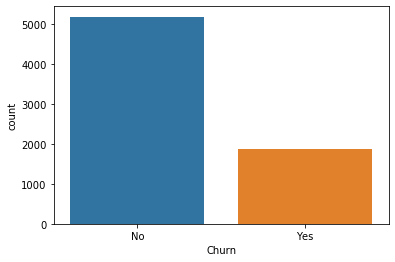

In [97]:
sns.countplot(x='Churn', data=dataset)

In [98]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [99]:
dataset.drop(['customerID'], axis=1, inplace=True)

In [100]:
dataset.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [101]:
dataset.Churn.replace('Yes', 1, inplace=True)
dataset.Churn.replace('No', 0, inplace=True)

dataset.Partner.replace('Yes', 1, inplace=True)
dataset.Partner.replace('No', 0, inplace=True)

dataset.Dependents.replace('Yes', 1, inplace=True)
dataset.Dependents.replace('No', 0, inplace=True)

dataset.PhoneService.replace('Yes', 1, inplace=True)
dataset.PhoneService.replace('No', 0, inplace=True)

dataset.PaperlessBilling.replace('Yes', 1, inplace=True)
dataset.PaperlessBilling.replace('No', 0, inplace=True)

In [102]:
numerical_culumns = [column for column in dataset if dataset[column].dtype == 'int64']

## Numerical Data

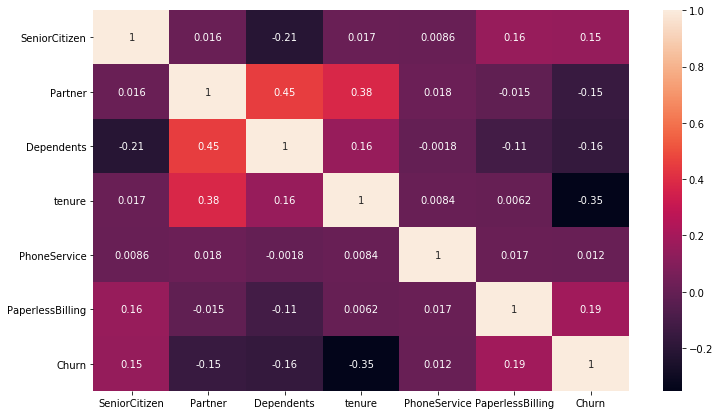

In [103]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset[numerical_culumns].corr(), annot=True)

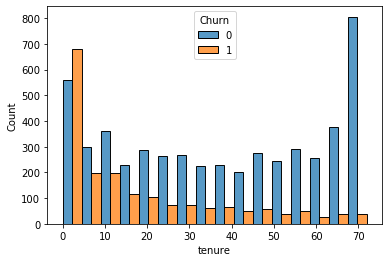

In [104]:
sns.histplot(x='tenure', data=dataset, hue='Churn', multiple='dodge')

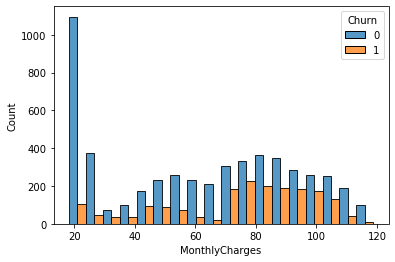

In [105]:
sns.histplot(x='MonthlyCharges', data=dataset, hue='Churn', multiple='dodge')

## Categorical Data

### One Hot Encoding

In [106]:
dataset.TotalCharges.replace(' ', np.nan, inplace=True)
dataset.dropna(inplace=True)

In [107]:
dataset.TotalCharges = dataset.TotalCharges.astype('float64')

In [108]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16])], remainder='passthrough')
X = transformer.fit_transform(X)

In [111]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X, y = smk.fit_resample(X, y)

# Split and Feature Scaling

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[:, [25, 28, 29]] = scaler.fit_transform(X_train[:, [25, 28, 29]])
X_test[:, [25, 28, 29]] = scaler.transform(X_test[:, [25, 28, 29]])

In [114]:
len(X_train[0])

30

# Model

In [119]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dropout(0.5))

model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [120]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

es = EarlyStopping(patience=20)

In [121]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [122]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.8666 - accuracy: 0.6189 - val_loss: 0.6666 - val_accuracy: 0.7737
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7464 - val_loss: 0.5459 - val_accuracy: 0.7811
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7766 - val_loss: 0.5098 - val_accuracy: 0.7863
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7840 - val_loss: 0.4949 - val_accuracy: 0.7884
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7801 - val_loss: 0.4869 - val_accuracy: 0.7895
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7823 - val_loss: 0.4841 - val_accuracy: 0.7905
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7842 - val_loss: 0.4782 - val_accuracy: 0.7900

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8314 - val_loss: 0.4330 - val_accuracy: 0.8226
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8352 - val_loss: 0.4280 - val_accuracy: 0.8200
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8373 - val_loss: 0.4347 - val_accuracy: 0.8147
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8343 - val_loss: 0.4305 - val_accuracy: 0.8179
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8365 - val_loss: 0.4297 - val_accuracy: 0.8179
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8387 - val_loss: 0.4268 - val_accuracy: 0.8216
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8365 - val_loss: 0.4298 - val_accuracy:

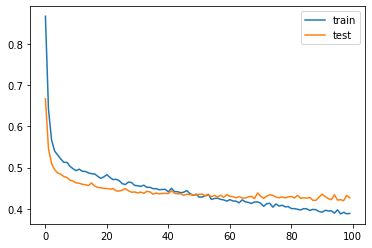

In [123]:
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Metrics

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

y_pred = y_pred > 0.5

y_pred = [1 if value == True else 0 for value in y_pred]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       962
           1       0.80      0.86      0.83       938

    accuracy                           0.82      1900
   macro avg       0.82      0.82      0.82      1900
weighted avg       0.82      0.82      0.82      1900

[[757 205]
 [133 805]]
0.8221052631578948
